In [2]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### Load the dataset

In [3]:

# Load the dataset from the CSV file
data = pd.read_csv('polynomial_data.csv', header=None)

# Remove the first row (contains non-numeric strings like 'x' and 'y')
data = data.iloc[1:]

# Convert the data to numeric types
data[0] = pd.to_numeric(data[0], errors='coerce')
data[1] = pd.to_numeric(data[1], errors='coerce')

x_data = data.iloc[:, 0].values #numpy arrays
y_data = data.iloc[:, 1].values

Normalize the data

In [4]:
# Normalize x_data and y_data to have mean 0 and standard deviation 1
x_data_normalized = (x_data - np.mean(x_data)) / np.std(x_data)
y_data_normalized = (y_data - np.mean(y_data)) / np.std(y_data)

print("x_data range:", x_data_normalized.min(), "to", x_data_normalized.max())
print("y_data range:", y_data_normalized.min(), "to", y_data_normalized.max())

x_data range: -1.7303196195127541 to 1.7303196195127541
y_data range: -2.6996104521729873 to 2.5737730059995623


Transform the NumPy arrays into tensors

In [5]:

x_train = torch.tensor(x_data_normalized, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(y_data_normalized, dtype=torch.float32).view(-1, 1)

In [6]:
# Define the cubic model: y = ax^3 + bx^2 + cx + d
class CubicModel(nn.Module):
    def __init__(self):
        super(CubicModel, self).__init__()
        # Initialize coefficients (a, b, c, d) as trainable parameters
        self.a = nn.Parameter(torch.randn(1))
        self.b = nn.Parameter(torch.randn(1))
        self.c = nn.Parameter(torch.randn(1))
        self.d = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.a * x**3 + self.b * x**2 + self.c * x + self.d

# Instantiate the model
model = CubicModel()

# Define the loss function (Mean Squared Error) and the optimizer (Stochastic Gradient Descent)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

Epoch 1000, Parameter a, Gradient Norm: 0.20613060891628265
Epoch 1000, Parameter b, Gradient Norm: 0.06221524253487587
Epoch 1000, Parameter c, Gradient Norm: 0.42570388317108154
Epoch 1000, Parameter d, Gradient Norm: 0.12363429367542267
Epoch [1000/10000], Loss: 0.44296273589134216
Epoch 1000, Parameter a, Value: 1.2965378761291504
Epoch 1000, Parameter b, Value: -0.14764836430549622
Epoch 1000, Parameter c, Value: -1.6303913593292236
Epoch 1000, Parameter d, Value: 0.2094040811061859


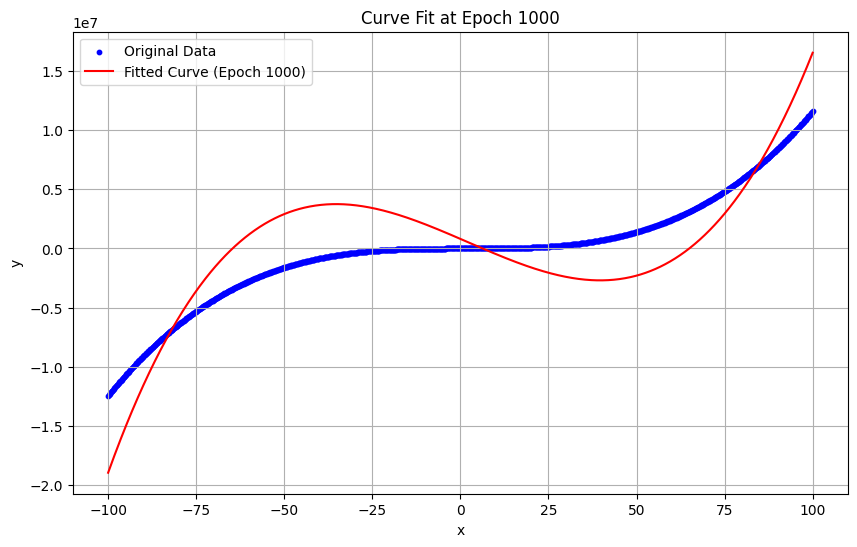

Epoch 2000, Parameter a, Gradient Norm: 0.15843503177165985
Epoch 2000, Parameter b, Gradient Norm: 0.040224071592092514
Epoch 2000, Parameter c, Gradient Norm: 0.3280088007450104
Epoch 2000, Parameter d, Gradient Norm: 0.05963364243507385
Epoch [2000/10000], Loss: 0.2580714821815491
Epoch 2000, Parameter a, Value: 1.1154694557189941
Epoch 2000, Parameter b, Value: -0.09392531961202621
Epoch 2000, Parameter c, Value: -1.2556328773498535
Epoch 2000, Parameter d, Value: 0.12372272461652756


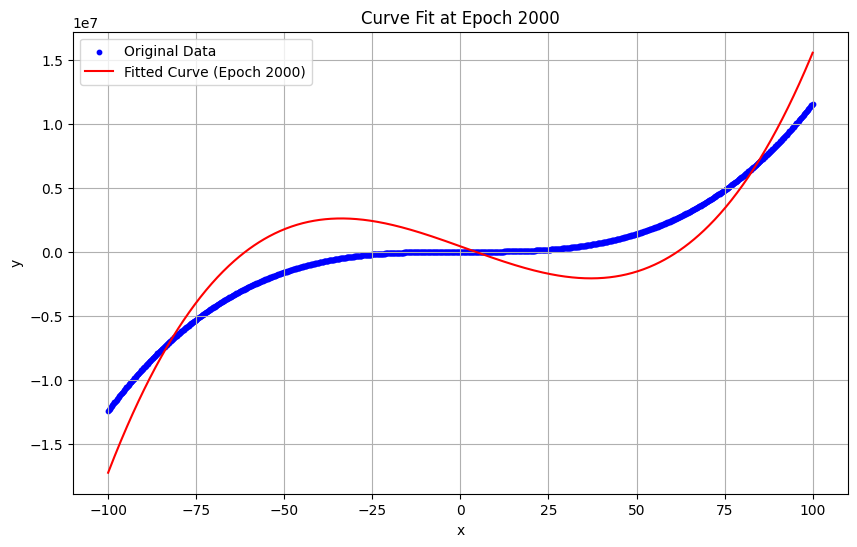

Epoch 3000, Parameter a, Gradient Norm: 0.12201887369155884
Epoch 3000, Parameter b, Gradient Norm: 0.02113320864737034
Epoch 3000, Parameter c, Gradient Norm: 0.2526160478591919
Epoch 3000, Parameter d, Gradient Norm: 0.031215904280543327
Epoch [3000/10000], Loss: 0.15179473161697388
Epoch 3000, Parameter a, Value: 0.9760528802871704
Epoch 3000, Parameter b, Value: -0.06425141543149948
Epoch 3000, Parameter c, Value: -0.9669969081878662
Epoch 3000, Parameter d, Value: 0.07984928041696548


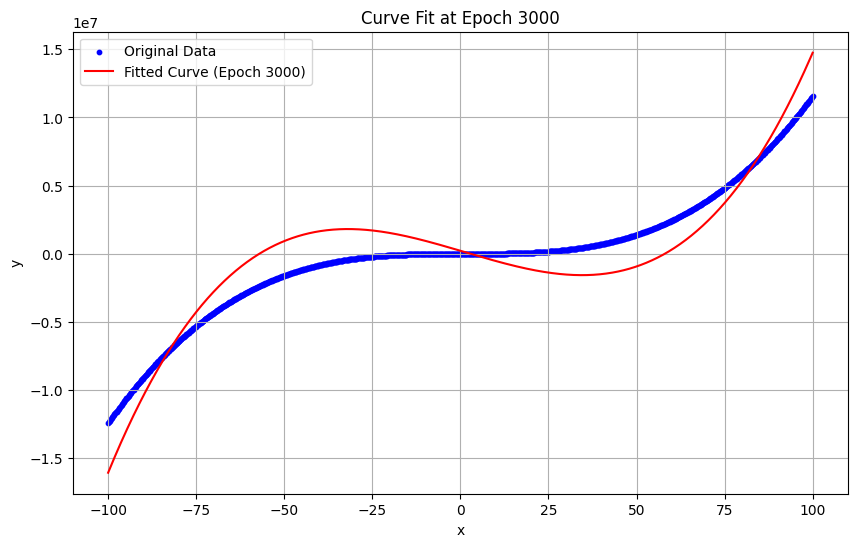

Epoch 4000, Parameter a, Gradient Norm: 0.09397292882204056
Epoch 4000, Parameter b, Gradient Norm: 0.011075371876358986
Epoch 4000, Parameter c, Gradient Norm: 0.19455228745937347
Epoch 4000, Parameter d, Gradient Norm: 0.01635897159576416
Epoch [4000/10000], Loss: 0.0896838903427124
Epoch 4000, Parameter a, Value: 0.8686811327934265
Epoch 4000, Parameter b, Value: -0.048689696937799454
Epoch 4000, Parameter c, Value: -0.7447037696838379
Epoch 4000, Parameter d, Value: 0.05686390772461891


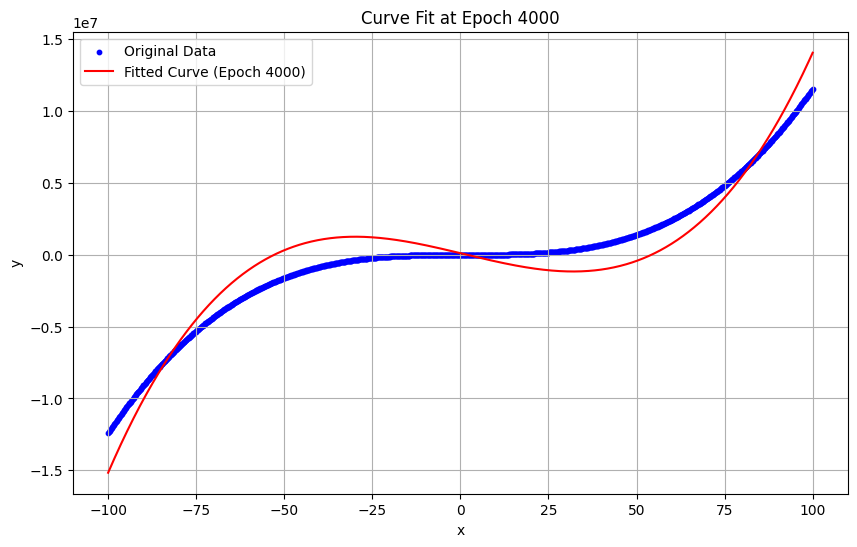

Epoch 5000, Parameter a, Gradient Norm: 0.07237373292446136
Epoch 5000, Parameter b, Gradient Norm: 0.005804282147437334
Epoch 5000, Parameter c, Gradient Norm: 0.14983417093753815
Epoch 5000, Parameter d, Gradient Norm: 0.008573094382882118
Epoch [5000/10000], Loss: 0.05309806391596794
Epoch 5000, Parameter a, Value: 0.7859886884689331
Epoch 5000, Parameter b, Value: -0.0405343696475029
Epoch 5000, Parameter c, Value: -0.5735042691230774
Epoch 5000, Parameter d, Value: 0.04481813684105873


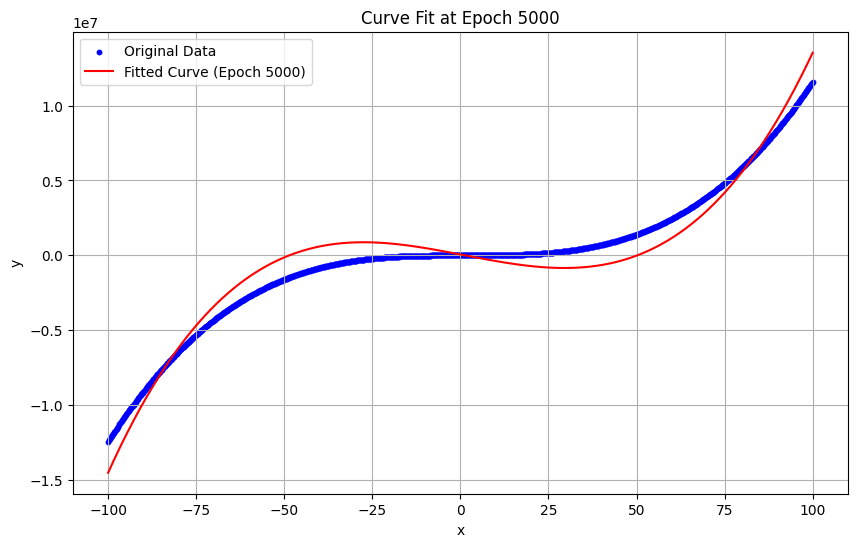

Epoch 6000, Parameter a, Gradient Norm: 0.05573805421590805
Epoch 6000, Parameter b, Gradient Norm: 0.003041834570467472
Epoch 6000, Parameter c, Gradient Norm: 0.11539525538682938
Epoch 6000, Parameter d, Gradient Norm: 0.00449282955378294
Epoch [6000/10000], Loss: 0.03146776184439659
Epoch 6000, Parameter a, Value: 0.7223032712936401
Epoch 6000, Parameter b, Value: -0.03626039996743202
Epoch 6000, Parameter c, Value: -0.4416557252407074
Epoch 6000, Parameter d, Value: 0.03850536793470383


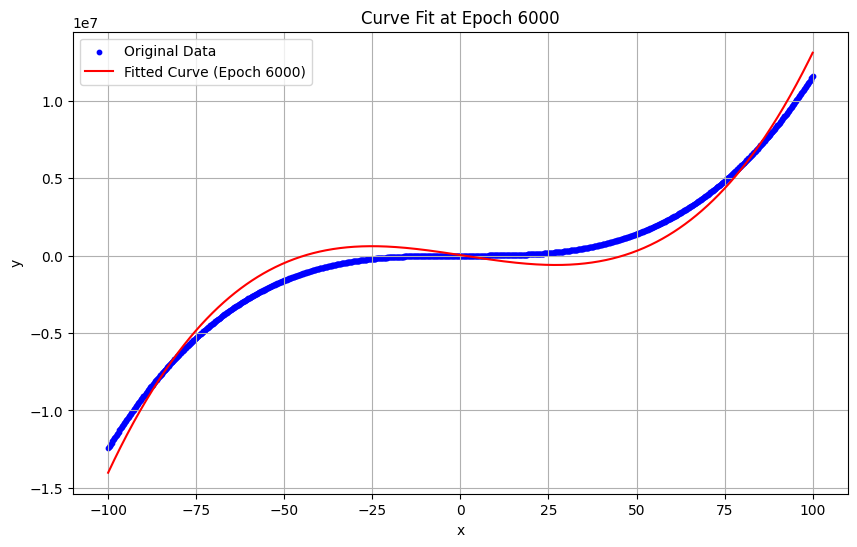

Epoch 7000, Parameter a, Gradient Norm: 0.04292643442749977
Epoch 7000, Parameter b, Gradient Norm: 0.0015941797755658627
Epoch 7000, Parameter c, Gradient Norm: 0.08887173980474472
Epoch 7000, Parameter d, Gradient Norm: 0.002354519907385111
Epoch [7000/10000], Loss: 0.01865723729133606
Epoch 7000, Parameter a, Value: 0.6732556819915771
Epoch 7000, Parameter b, Value: -0.034020595252513885
Epoch 7000, Parameter c, Value: -0.3401118814945221
Epoch 7000, Parameter d, Value: 0.03519710525870323


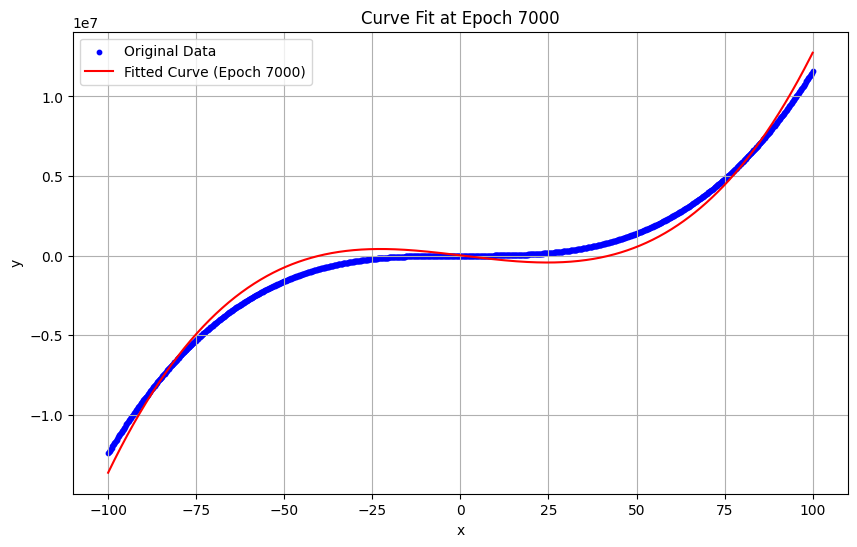

Epoch 8000, Parameter a, Gradient Norm: 0.03305976092815399
Epoch 8000, Parameter b, Gradient Norm: 0.0008353586308658123
Epoch 8000, Parameter c, Gradient Norm: 0.06844458729028702
Epoch 8000, Parameter d, Gradient Norm: 0.001233957358635962
Epoch [8000/10000], Loss: 0.011064193211495876
Epoch 8000, Parameter a, Value: 0.6354817152023315
Epoch 8000, Parameter b, Value: -0.03284677118062973
Epoch 8000, Parameter c, Value: -0.2619079649448395
Epoch 8000, Parameter d, Value: 0.03346334770321846


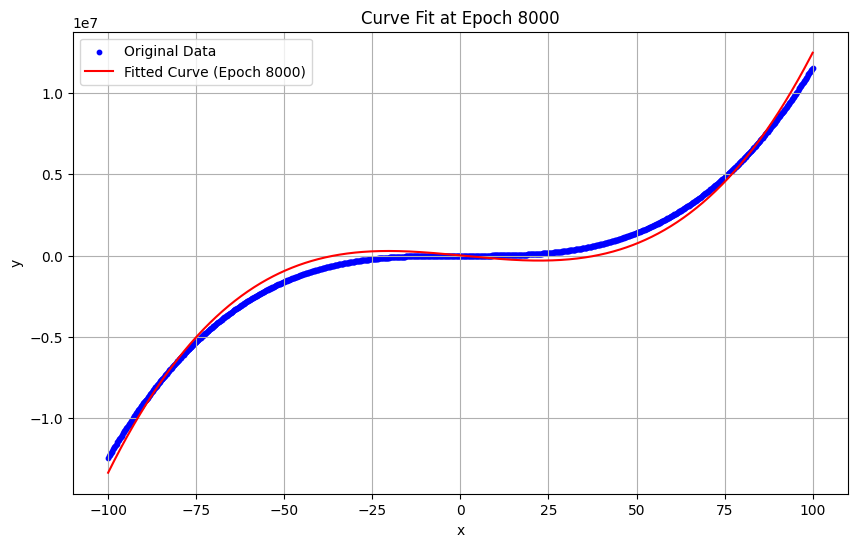

Epoch 9000, Parameter a, Gradient Norm: 0.025461366400122643
Epoch 9000, Parameter b, Gradient Norm: 0.00043783802539110184
Epoch 9000, Parameter c, Gradient Norm: 0.05271247401833534
Epoch 9000, Parameter d, Gradient Norm: 0.0006466464838013053
Epoch [9000/10000], Loss: 0.006561983842402697
Epoch 9000, Parameter a, Value: 0.6063902974128723
Epoch 9000, Parameter b, Value: -0.03223162144422531
Epoch 9000, Parameter c, Value: -0.20167945325374603
Epoch 9000, Parameter d, Value: 0.032554741948843


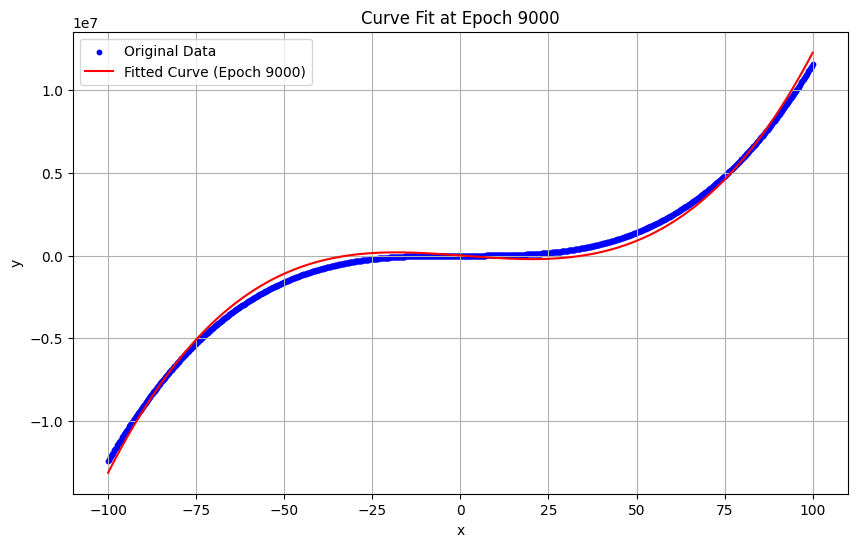

Epoch 10000, Parameter a, Gradient Norm: 0.019609792158007622
Epoch 10000, Parameter b, Gradient Norm: 0.0002293720026500523
Epoch 10000, Parameter c, Gradient Norm: 0.04059622064232826
Epoch 10000, Parameter d, Gradient Norm: 0.0003389310440979898
Epoch [10000/10000], Loss: 0.0038919735234230757
Epoch 10000, Parameter a, Value: 0.5839855074882507
Epoch 10000, Parameter b, Value: -0.03190924972295761
Epoch 10000, Parameter c, Value: -0.15529435873031616
Epoch 10000, Parameter d, Value: 0.03207859396934509


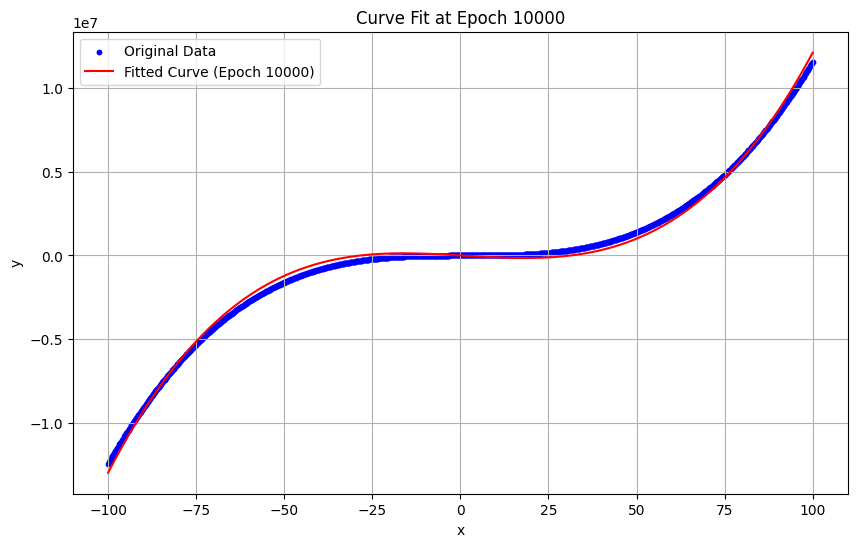

In [8]:
# Initialize lists for debugging
losses = []
gradient_norms = {name: [] for name, _ in model.named_parameters()}

# Training the model
num_epochs = 10000

for epoch in range(num_epochs):
    # Forward pass: compute predicted y
    y_pred = model(x_train)

    # Compute loss
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    # Zero gradients
    optimizer.zero_grad()

    # Backward pass to compute gradients
    loss.backward()

    # Check and store gradient values
    for name, param in model.named_parameters():
        if param.grad is not None:
            grad_norm = param.grad.norm()
            gradient_norms[name].append(grad_norm.item())  # Store gradient norms for later analysis
            if (epoch + 1) % 1000 == 0:  # Print gradient norms every 1000 epochs
                print(f"Epoch {epoch + 1}, Parameter {name}, Gradient Norm: {grad_norm.item()}")

    # Update weights
    optimizer.step()

    # Print loss every 1000 epochs
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

        # Check parameter values
        for name, param in model.named_parameters():
            print(f"Epoch {epoch + 1}, Parameter {name}, Value: {param.item()}")

        # Plot current curve fitting progress
        with torch.no_grad():
            y_pred_plot = model(x_train).detach().numpy()  # Model predictions (normalized scale)
            y_pred_plot_denormalized = (y_pred_plot * np.std(y_data)) + np.mean(y_data)  # Denormalize predictions
            
            plt.figure(figsize=(10, 6))
            plt.scatter(x_data, y_data, label='Original Data', color='blue', s=10)
            plt.plot(x_data, y_pred_plot_denormalized, label=f'Fitted Curve (Epoch {epoch + 1})', color='red')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.legend()
            plt.title(f'Curve Fit at Epoch {epoch + 1}')
            plt.grid(True)
            plt.show()



Estimated coefficients:
 a = 0.5839855074882507
 b = -0.03190924972295761
 c = -0.15529435873031616
 d = 0.03207859396934509


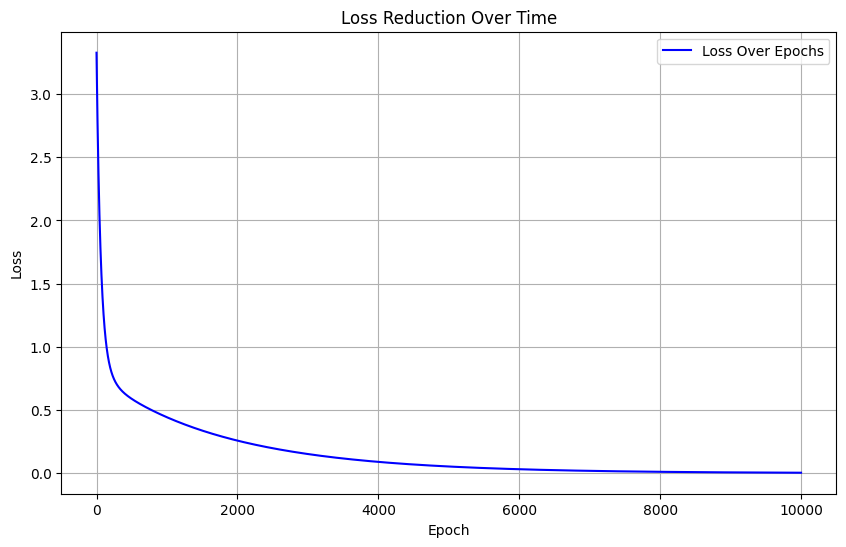

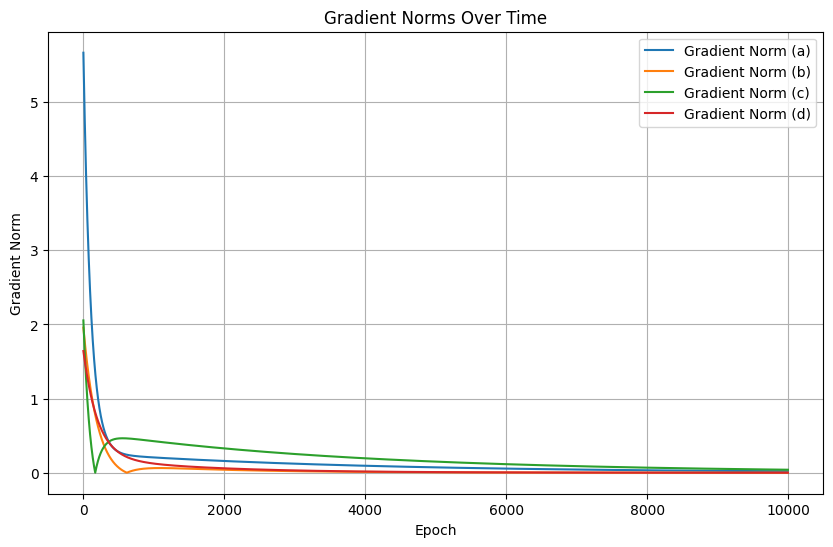

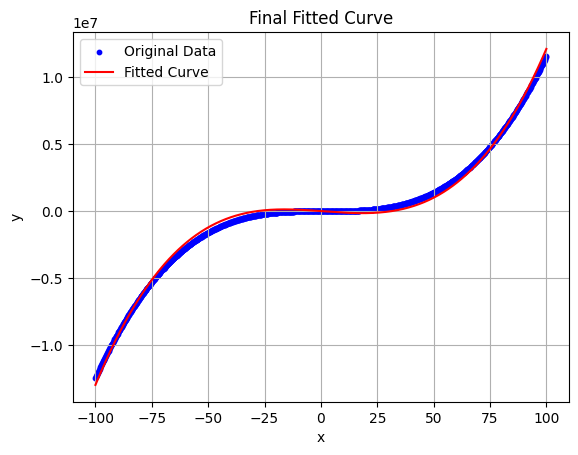

Final Loss Value: 0.0038919735234230757


In [9]:
# Extract learned coefficients
a = model.a.item()
b = model.b.item()
c = model.c.item()
d = model.d.item()
print(f'Estimated coefficients:\n a = {a}\n b = {b}\n c = {c}\n d = {d}')

# Plot the loss trend
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), losses, label='Loss Over Epochs', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Reduction Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Visualize the gradient norms
plt.figure(figsize=(10, 6))
for name, grad_norms in gradient_norms.items():
    plt.plot(range(num_epochs), grad_norms, label=f'Gradient Norm ({name})')
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norms Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the final fitted curve
x_fit = np.linspace(-100, 100, 1000)
x_fit_normalized = (x_fit - np.mean(x_data)) / np.std(x_data)  # Normalize x_fit
x_fit_tensor = torch.tensor(x_fit_normalized, dtype=torch.float32).view(-1, 1)
y_fit_tensor = model(x_fit_tensor)
y_fit_normalized = y_fit_tensor.detach().numpy()
y_fit = (y_fit_normalized * np.std(y_data)) + np.mean(y_data)  # Denormalize predictions

plt.scatter(x_data, y_data, label='Original Data', color='blue', s=10)
plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Final Fitted Curve')
plt.grid(True)
plt.show()

print(f"Final Loss Value: {loss.item()}")
